# LOAN APPLICATION STATUS PREDICTION

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import RocCurveDisplay,accuracy_score,mean_absolute_error,mean_squared_error, r2_score, classification_report, confusion_matrix,auc, roc_curve
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.svm import SVC,SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import zscore
from sklearn import metrics
from sklearn.preprocessing import PowerTransformer

DATA COLLECTION

In [2]:
df=pd.read_csv('loan_prediction.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


DATA UNDERSTANDING !!

In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


from the data describe :
we can find few missing data ||
The standard deviation is relatively high, indicating a wide variation in income levels in ApplicantIncome and in ApplicantIncome, there is a considerable variation,so we can say that loan columns are left skewed and other columns are right skewed


DATA CLEANING


In [6]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df.drop('Loan_ID',inplace=True,axis=1)

In [8]:
df['tot_income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [9]:
df.drop('ApplicantIncome',inplace=True,axis=1)
df.drop('CoapplicantIncome',inplace=True,axis=1)

In [10]:
ccol = df.select_dtypes(include=['object']).columns
print("Categorical columns are:",ccol)
print("\n")

ncol = df.select_dtypes(include=['int64','float64']).columns
print("Numerical columns are:",ncol)

Categorical columns are: Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')


Numerical columns are: Index(['LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'tot_income'], dtype='object')


IterativeImputer to impute missing values in the specified columns of a DataFrame.Dataset includes both numerical and categorical features, as IterativeImputer can handle both types.

In [11]:
to_impute = ['LoanAmount', 'Loan_Amount_Term', 'Credit_History']
i_i = IterativeImputer()
df[to_impute] = i_i.fit_transform(df[to_impute])

In [12]:
columns= ['Gender','Married','Dependents','Self_Employed']
for i in columns:
    df[i].fillna(df[i].mode()[0], inplace=True)

In [13]:
df.isna().sum()

Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
tot_income          0
dtype: int64

In [14]:
df.duplicated().sum()

0

In [15]:
df.nunique()

Gender                2
Married               2
Dependents            4
Education             2
Self_Employed         2
LoanAmount          208
Loan_Amount_Term     23
Credit_History       47
Property_Area         3
Loan_Status           2
tot_income          554
dtype: int64

LabelEncoder is a utility in scikit-learn that converts categorical labels into numerical labels.

In [16]:
LE = LabelEncoder()
for i in df.select_dtypes(include='object').columns:
    df[i] = LE.fit_transform(df[i])
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tot_income
0,1,0,0,0,0,146.497683,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0


GRAPHICAL DATA ANALYSIS

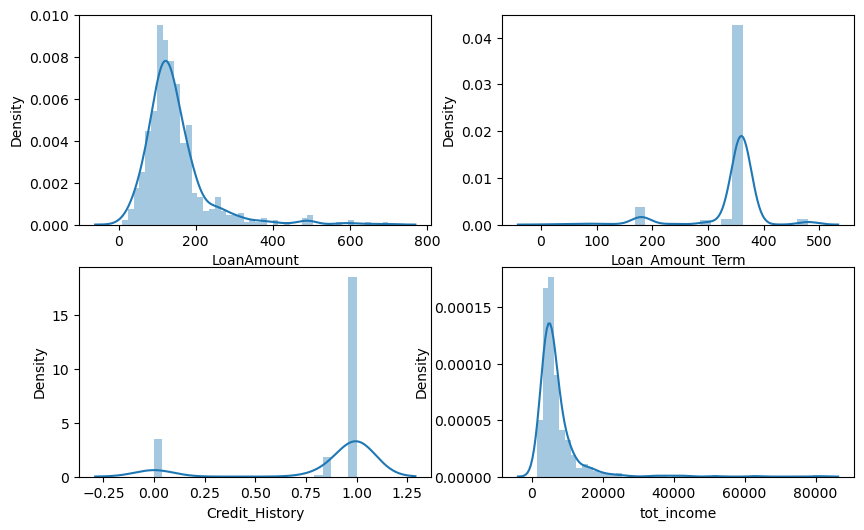

In [17]:
plt.figure(figsize=(10,6))
pltno=1
for i in ncol:
    if pltno<13:
        ax=plt.subplot(2,2,pltno)
        sns.distplot(df[i])
        plt.xlabel(i)
    pltno+=1
plt.show()

the numerical data appears to be right skewded

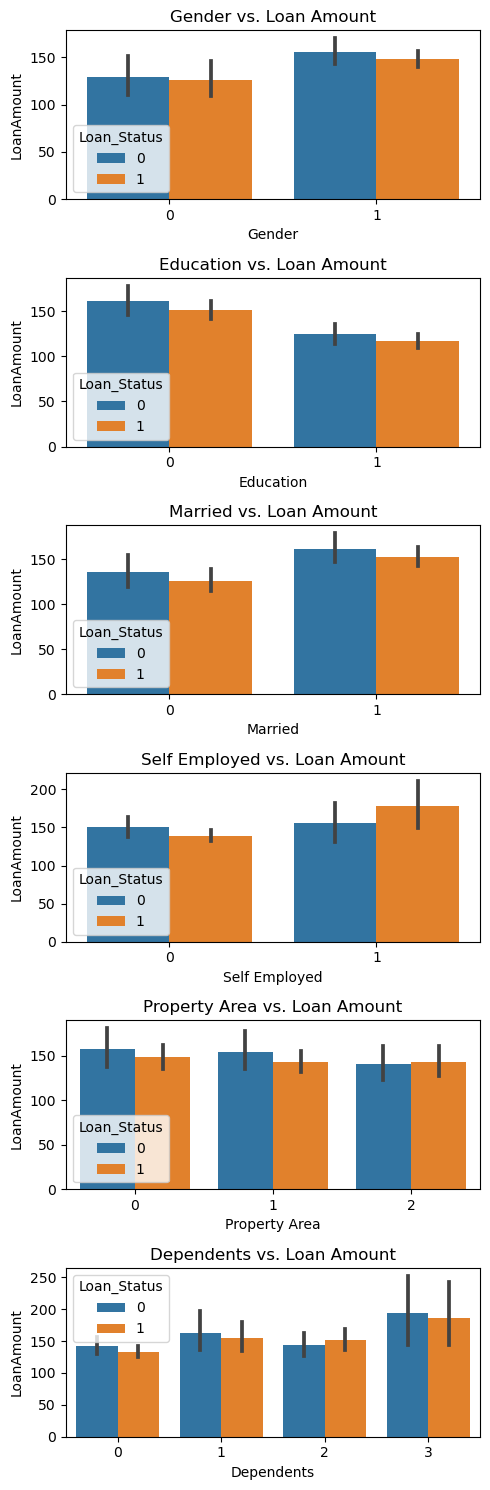

In [18]:
f, axes = plt.subplots(6, 1, figsize=(5, 15))

sns.barplot(x='Gender', y='LoanAmount', hue='Loan_Status', ax=axes[0], data=df)
axes[0].set_title('Gender vs. Loan Amount')
axes[0].set_xlabel('Gender')

sns.barplot(x='Education', y='LoanAmount', hue='Loan_Status', ax=axes[1], data=df)
axes[1].set_title('Education vs. Loan Amount')
axes[1].set_xlabel('Education')

sns.barplot(x='Married', y='LoanAmount', hue='Loan_Status', ax=axes[2], data=df)
axes[2].set_title('Married vs. Loan Amount')
axes[2].set_xlabel('Married')

sns.barplot(x='Self_Employed', y='LoanAmount', hue='Loan_Status', ax=axes[3], data=df)
axes[3].set_title('Self Employed vs. Loan Amount')
axes[3].set_xlabel('Self Employed')

sns.barplot(x='Property_Area', y='LoanAmount', hue='Loan_Status', ax=axes[4], data=df)
axes[4].set_title('Property Area vs. Loan Amount')
axes[4].set_xlabel('Property Area')

sns.barplot(x='Dependents', y='LoanAmount', hue='Loan_Status', ax=axes[5], data=df)
axes[5].set_title('Dependents vs. Loan Amount')
axes[5].set_xlabel('Dependents')

plt.tight_layout()
plt.show()

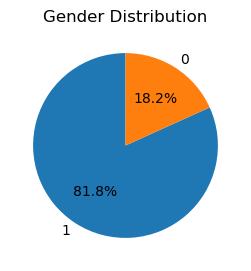

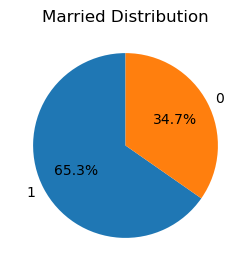

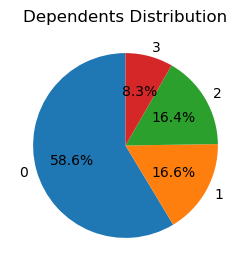

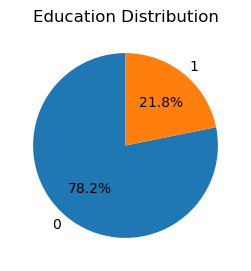

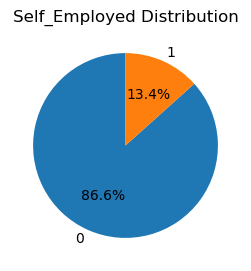

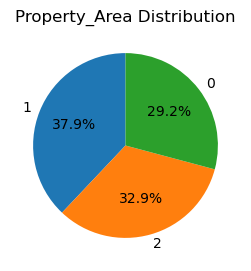

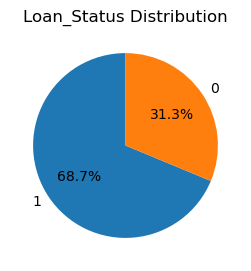

In [19]:
for column in ccol:
    plt.figure(figsize=(5, 3))
    value_counts = df[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
    plt.title(f'{column} Distribution')
    plt.show()

<Axes: xlabel='Married', ylabel='tot_income'>

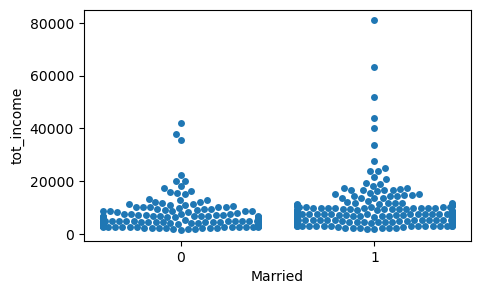

In [20]:
plt.figure(figsize=(5,3))
sns.swarmplot(x='Married',y='tot_income',data=df)

<Figure size 200x300 with 0 Axes>

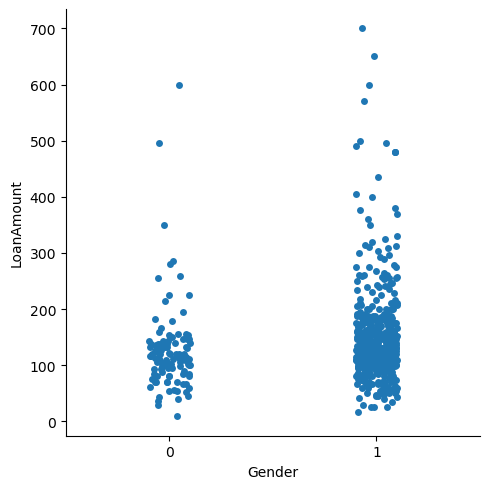

In [21]:
plt.figure(figsize=(2, 3))
sns.catplot(x='Gender',y='LoanAmount',data=df)

IDENTIFY THE OUTLIERS

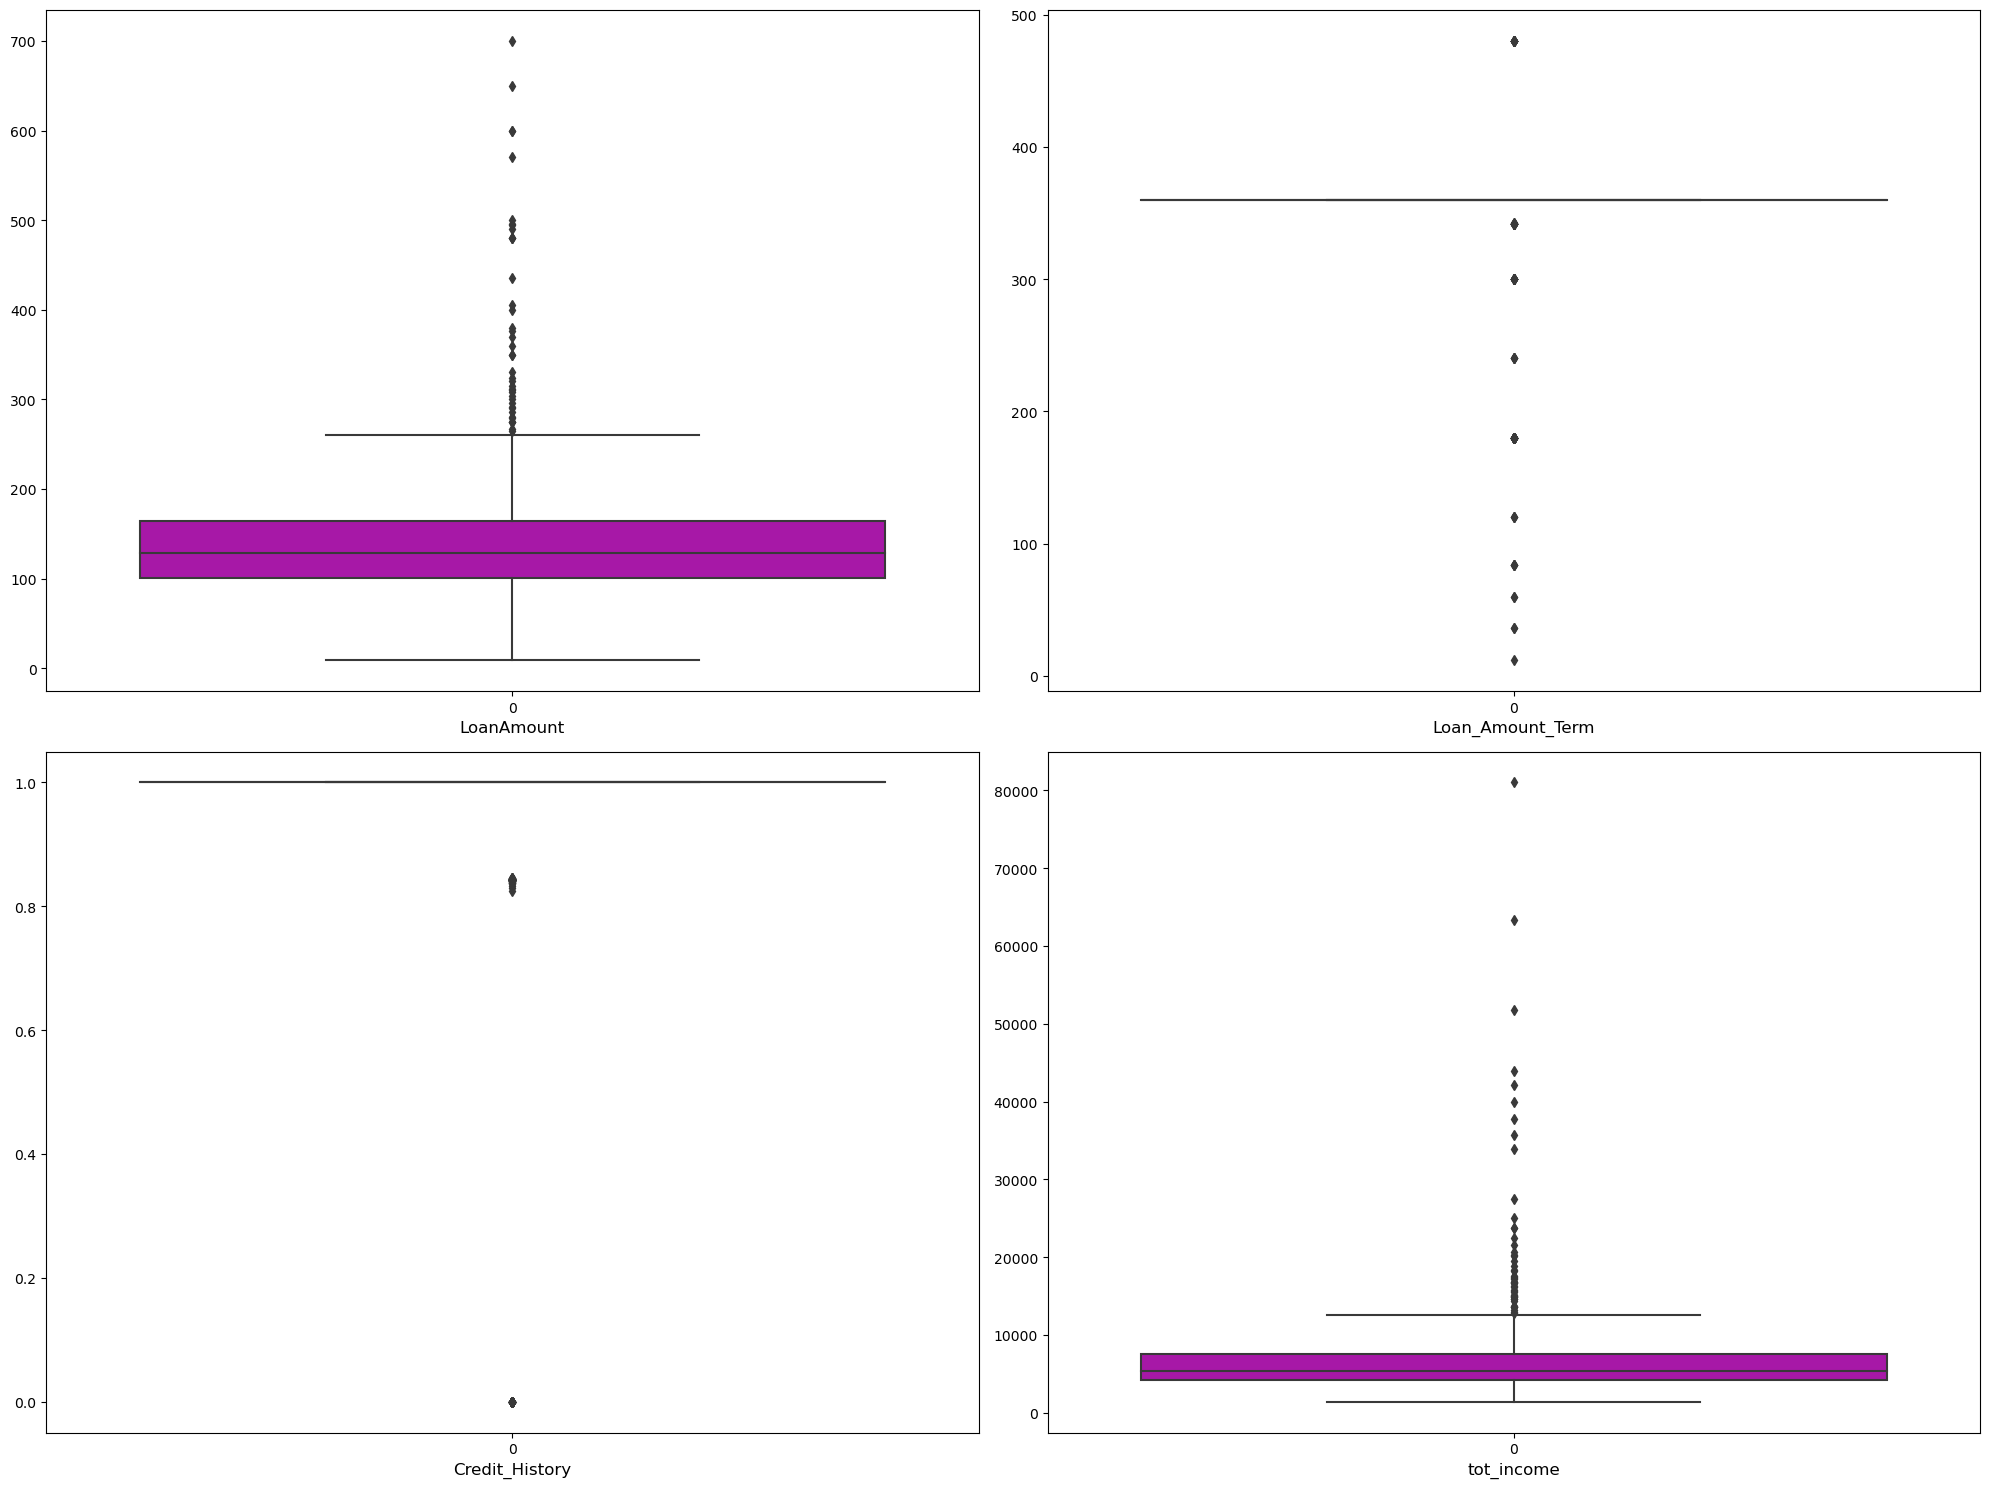

In [22]:
plt.figure(figsize=(20,15),facecolor="white")
pltno=1
for i in ncol:
    if pltno<=14:
        plt.subplot(2,2,pltno)
        sns.boxplot(df[i],color="m")
        plt.xlabel(i,fontsize=12)
    pltno+=1
plt.tight_layout()

OUTLIER REMOVAL

In [23]:
df.shape

(614, 11)

In [24]:
# METHOD 1
z=np.abs(zscore(df))
threshold=3
df1=df[(z<3).all(axis=1)]

In [25]:
df1.shape

(581, 11)

In [26]:
print("data loss ",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss  5.374592833876222


In [27]:
# METHOD 2
q1=df.quantile(.25)
q3=df.quantile(.75)
iqr=q3-q1
df2=df[~((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))).any(axis=1)]

In [28]:
df2.shape

(193, 11)

In [29]:
print("data loss ",((df.shape[0]-df2.shape[0])/df.shape[0])*100)

data loss  68.56677524429968


In [30]:
df=df1

FINDING SKEWNESS OF DATA

In [31]:
df.skew()

Gender             -1.633836
Married            -0.633385
Dependents          1.042928
Education           1.317262
Self_Employed       2.241256
LoanAmount          1.187303
Loan_Amount_Term   -2.087621
Credit_History     -1.933327
Property_Area      -0.054901
Loan_Status        -0.816015
tot_income          2.049400
dtype: float64

In [32]:
# scaler = PowerTransformer(method='yeo-johnson')
# df_trans = scaler.fit_transform(df)
# df = pd.DataFrame(df_trans, columns=df.columns)

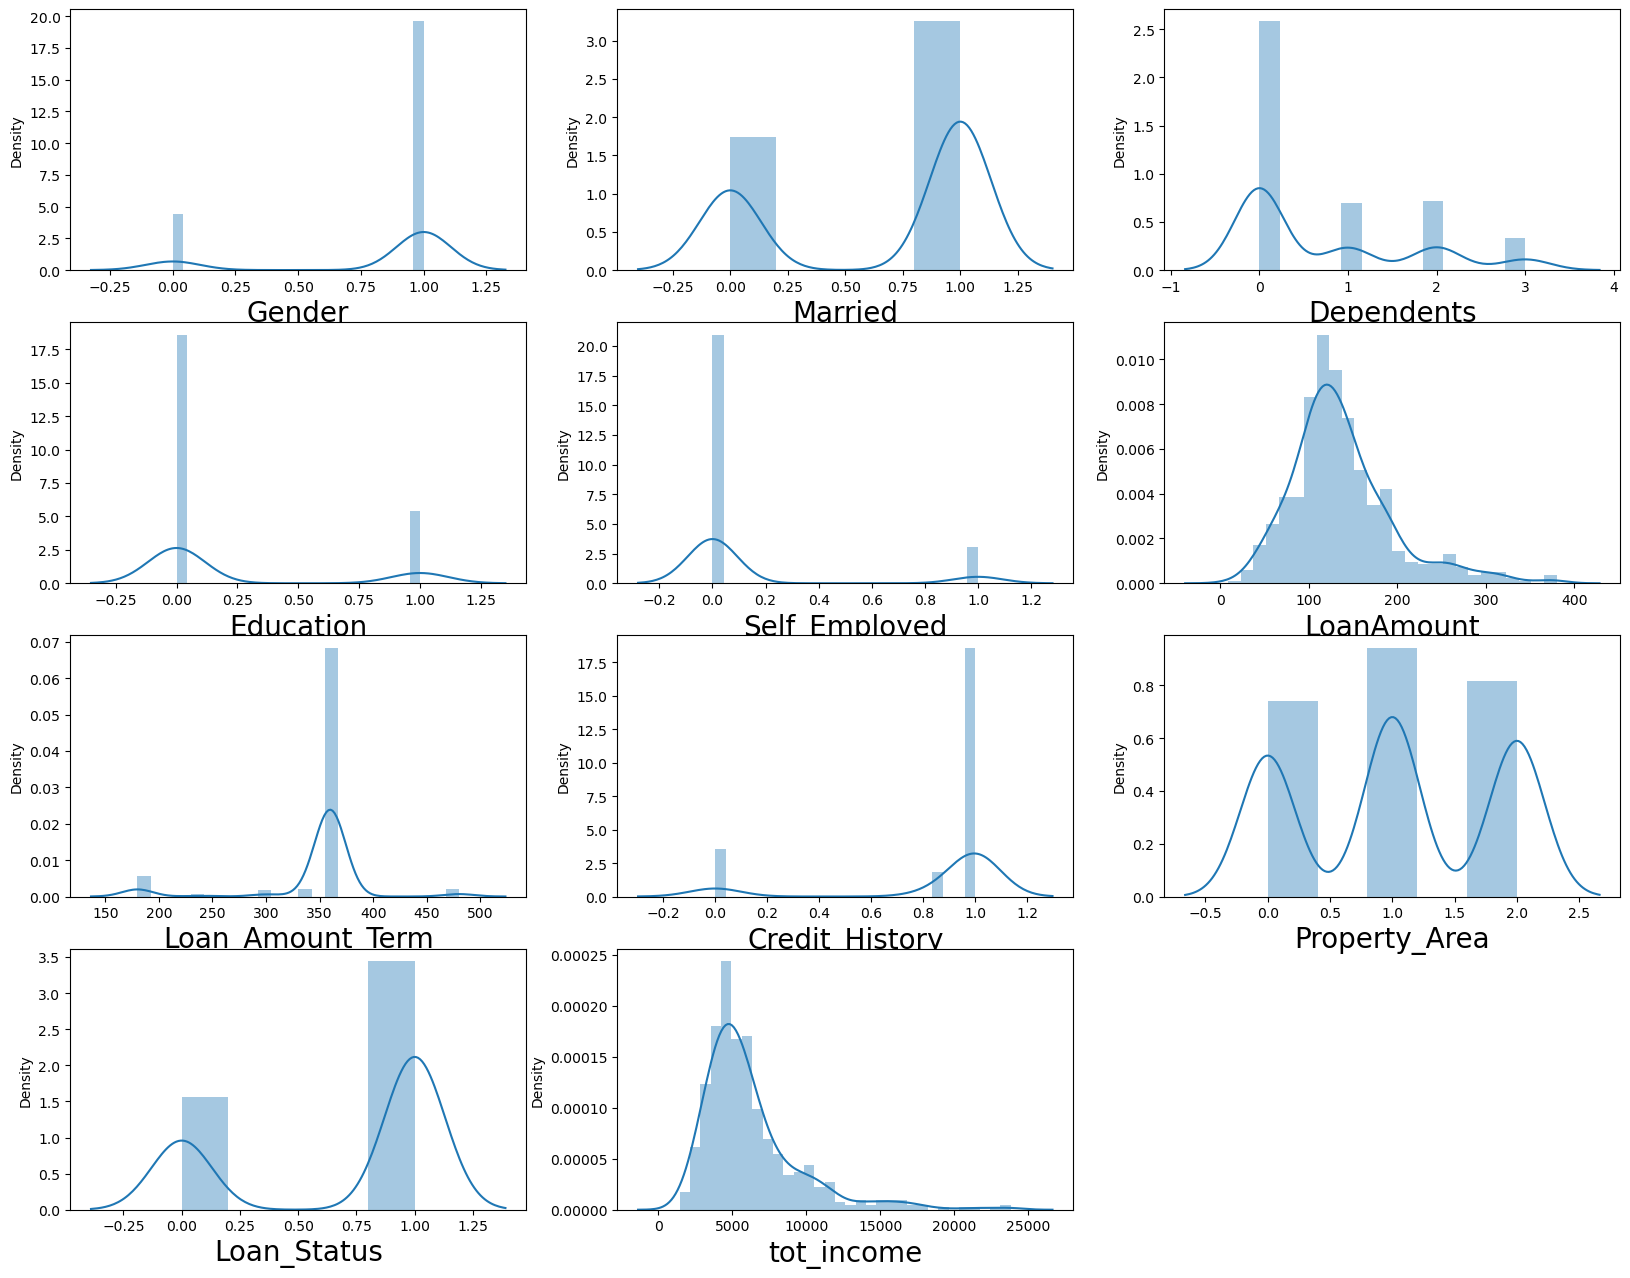

In [33]:
plt.figure(figsize=(20,40),facecolor='white')
plotnum=1
for col in df:
    if plotnum<=29:
        plt.subplot(10,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

FINDING DATA CORRELATION

In [34]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tot_income
Gender,1.000000,0.378253,0.189364,0.043837,-0.004952,0.162505,-0.103499,0.017888,-0.026375,0.015974,0.133637
Married,0.378253,1.000000,0.333347,0.023938,-0.012394,0.173167,-0.126523,0.013894,0.010477,0.083866,0.116299
Dependents,0.189364,0.333347,1.000000,0.066386,0.048548,0.153109,-0.081899,-0.014476,-0.000094,0.015482,0.082189
Education,0.043837,0.023938,0.066386,1.000000,-0.008463,-0.150565,-0.095444,-0.082412,-0.068190,-0.090617,-0.183722
Self_Employed,-0.004952,-0.012394,0.048548,-0.008463,1.000000,0.120933,-0.032549,-0.013631,-0.021552,-0.032848,0.210933
LoanAmount,0.162505,0.173167,0.153109,-0.150565,0.120933,1.000000,0.043041,0.012421,-0.078943,-0.044044,0.605458
Loan_Amount_Term,-0.103499,-0.126523,-0.081899,-0.095444,-0.032549,0.043041,1.000000,0.031201,-0.058928,-0.018705,-0.065937
Credit_History,0.017888,0.013894,-0.014476,-0.082412,-0.013631,0.012421,0.031201,1.000000,-0.009858,0.557702,0.044830
Property_Area,-0.026375,0.010477,-0.000094,-0.068190,-0.021552,-0.078943,-0.058928,-0.009858,1.000000,0.021711,-0.051768
Loan_Status,0.015974,0.083866,0.015482,-0.090617,-0.032848,-0.044044,-0.018705,0.557702,0.021711,1.000000,0.004014


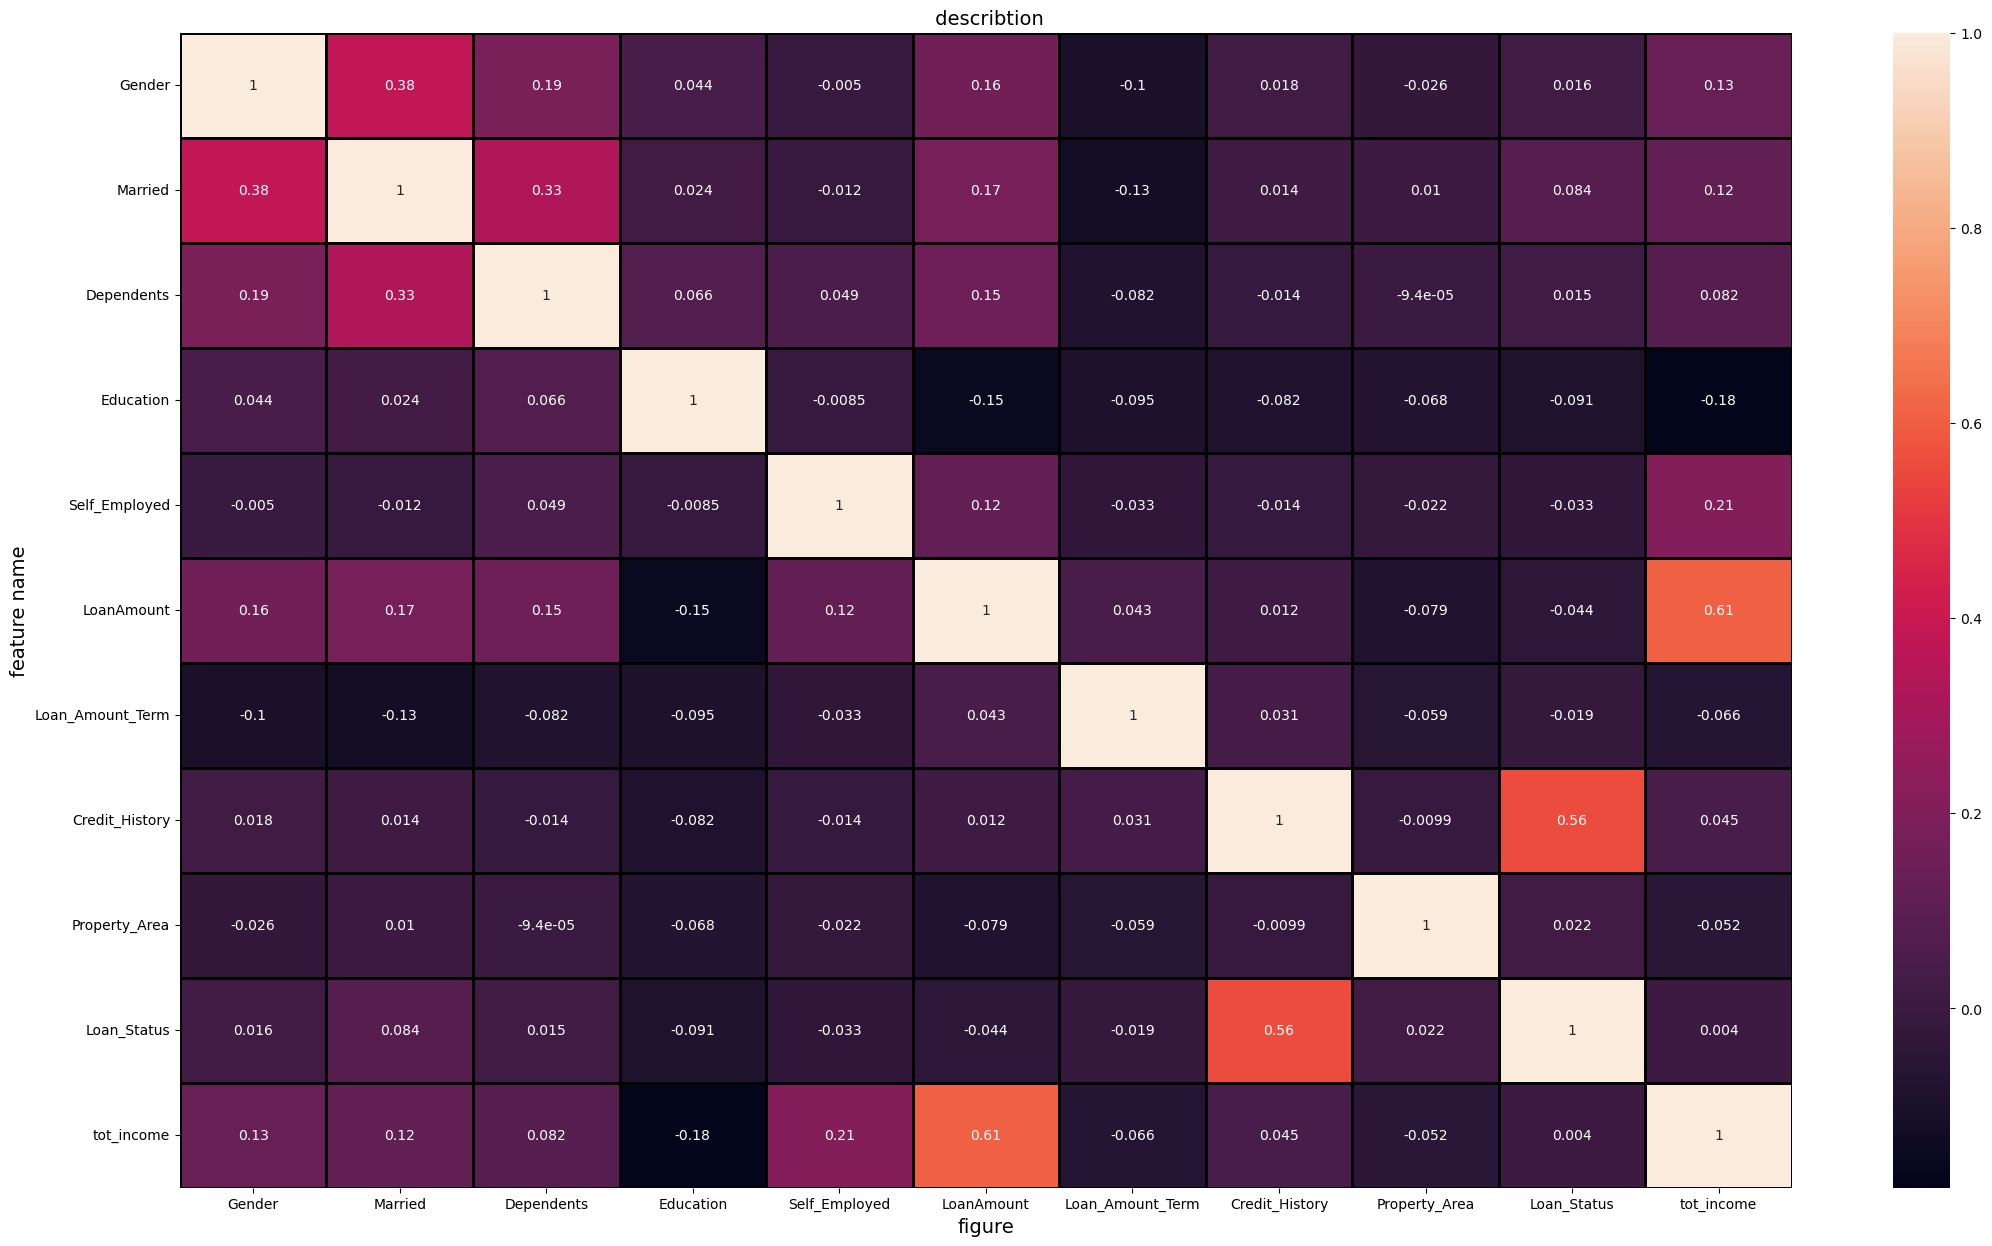

In [35]:
plt.figure(figsize = (26, 15))
sns.heatmap(df.corr(),linewidths=0.8,fmt='.2g',linecolor="black",annot=True)
plt.xlabel('figure',fontsize=14)
plt.ylabel("feature name",fontsize=14)
plt.title(" describtion",fontsize=14)
plt.show()

we observe that there is high correlation among tot-income and loan-amount along with loan-status and credit-history
and there is very less correlation among loan-amt and education

Analysing the Feature with target feature

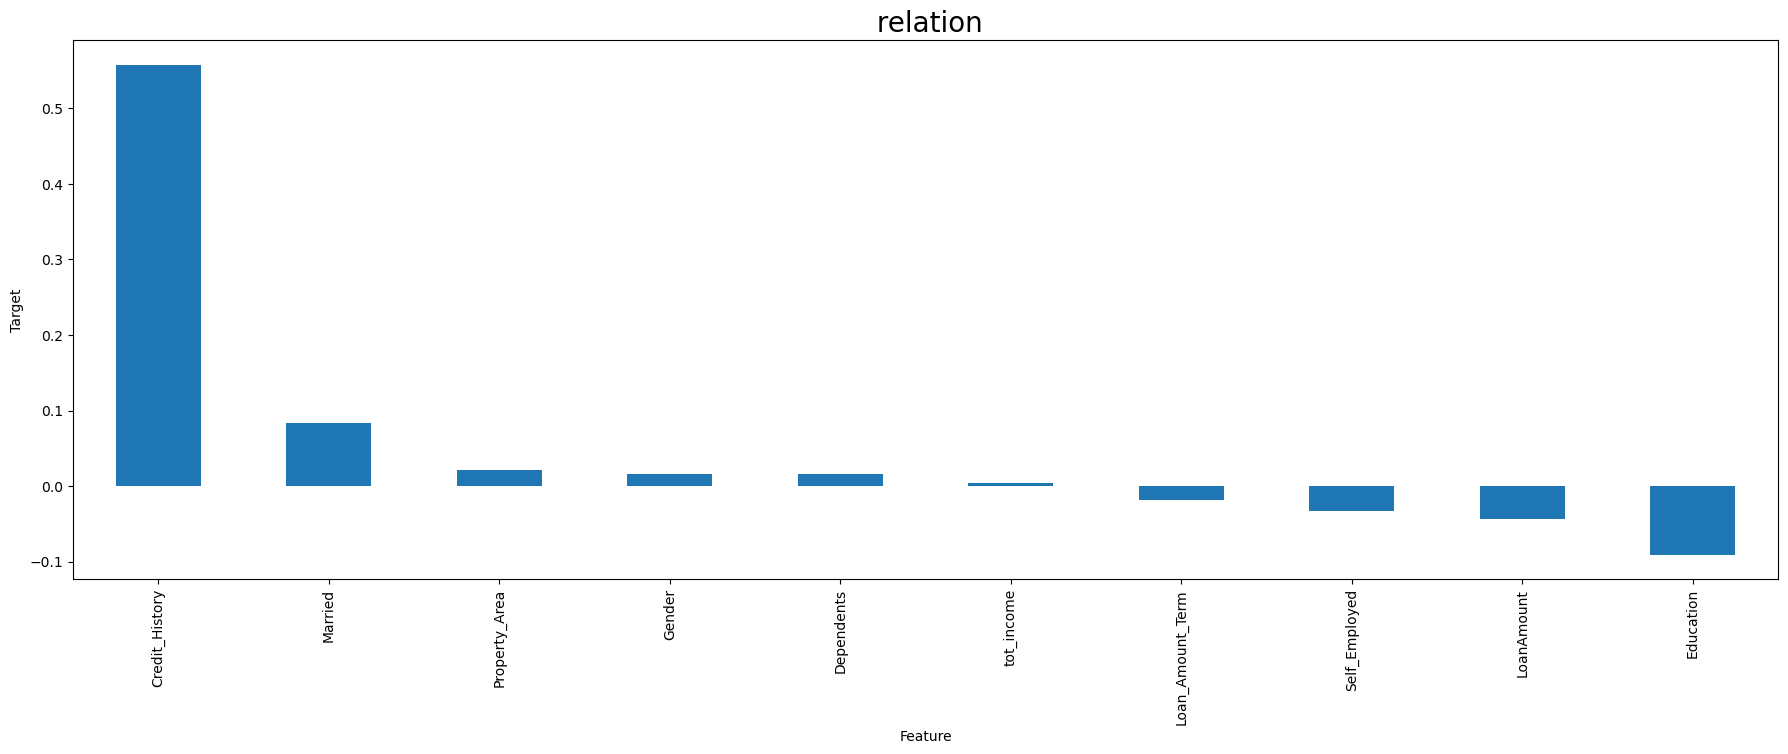

In [36]:
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.title(" relation",fontsize=20)
plt.show()

DATA PREPARATION

In [37]:
x=df.drop(['Loan_Status','tot_income'],axis=1)
y=df['Loan_Status']

In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.475119,-1.364576,-0.726530,-0.539547,-0.382043,0.165868,0.23859,0.454498,1.228573
1,0.475119,0.732828,0.276116,-0.539547,-0.382043,-0.155062,0.23859,0.454498,-1.307131
2,0.475119,0.732828,-0.726530,-0.539547,2.617509,-1.230745,0.23859,0.454498,1.228573
3,0.475119,0.732828,-0.726530,1.853406,-0.382043,-0.293860,0.23859,0.454498,1.228573
4,0.475119,-1.364576,-0.726530,-0.539547,-0.382043,0.070484,0.23859,0.454498,1.228573


Variance Inflation Factor

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif[" VIF val"]= [variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Feature"]=x.columns
vif

,VIF val,Feature
0,1.194086,Gender
1,1.295985,Married
2,1.152343,Dependents
3,1.056026,Education
4,1.020437,Self_Employed
5,1.112744,LoanAmount
6,1.040287,Loan_Amount_Term
7,1.008712,Credit_History
8,1.018577,Property_Area


Resampling for Balancing data

In [40]:
y.value_counts()

1    400
0    181
Name: Loan_Status, dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [42]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,tot_income
0,1,0,0,0,0,146.497683,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,120.000000,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,141.000000,360.0,1.0,2,1,6000.0


In [43]:
y1.value_counts()

1    400
0    400
Name: Loan_Status, dtype: int64

In [44]:
maxAcc=0
maxRs=0
for i in range(1, 200):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.30, random_state = i)
    RF=RandomForestClassifier()
    RF.fit(x_train,y_train)
    pred=RF.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc> maxAcc:
        maxAcc=acc
        maxRs=i
print("best accuracy is ",maxAcc," at random state ",maxRs)

best accuracy is  0.8583333333333333  at random state  40


In [45]:
 x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state = maxRs)

In [46]:
model={'dt':DecisionTreeClassifier(),'rf':RandomForestClassifier(),'lgR': LogisticRegression(),'nb':GaussianNB() ,
       'svc': SVC(kernel="linear", probability=True),'knn':KNeighborsClassifier(n_neighbors=3),'gb':GradientBoostingClassifier(),}     
print(model)


{'dt': DecisionTreeClassifier(), 'rf': RandomForestClassifier(), 'lgR': LogisticRegression(), 'nb': GaussianNB(), 'svc': SVC(kernel='linear', probability=True), 'knn': KNeighborsClassifier(n_neighbors=3), 'gb': GradientBoostingClassifier()}


In [47]:
for key, value in model.items():
    value.fit(x_train, y_train)
    
    if key == 'rf':
        print('RFC Feature Importances:', value.feature_importances_)
        print()
    
    elif key == 'dt':
        print('DT: Decision Trees do not have intercept or coefficients.')
        print()
    elif key == 'lgR':
        print('Logistic:', value.intercept_)
        print('Logistic coef:' ,  value.coef_)
        
    elif key == 'svm':
        print('svm intercept:', value.intercept_)
        print('svm coef:' ,  value.coef_)

    elif key == 'knn':
        print('KNN: k-Nearest Neighbors do not have intercept or coefficients.')
        print()

    elif key == 'gb':
         print('gradiant boosting do not have intercept or coefficients.')


DT: Decision Trees do not have intercept or coefficients.

RFC Feature Importances: [0.02590291 0.03741539 0.06581057 0.0315029  0.02965815 0.35325217
 0.05394198 0.33051595 0.07199998]

Logistic: [0.71167017]
Logistic coef: [[-0.12181849  0.14588293  0.03962759 -0.20675583 -0.21863306 -0.16448114
  -0.18113227  1.37562425  0.08995408]]
KNN: k-Nearest Neighbors do not have intercept or coefficients.

gradiant boosting do not have intercept or coefficients.


In [48]:

y_preds = {}

for key, value in model.items():
    value.fit(x_train, y_train)
    y_pred = value.predict(x_test)

    y_preds[key] = y_pred
y_pred

array([0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1])

In [49]:
value.score(x_train,y_train)

0.8891625615763546

In [50]:
value.score(x_test,y_test)

0.7828571428571428

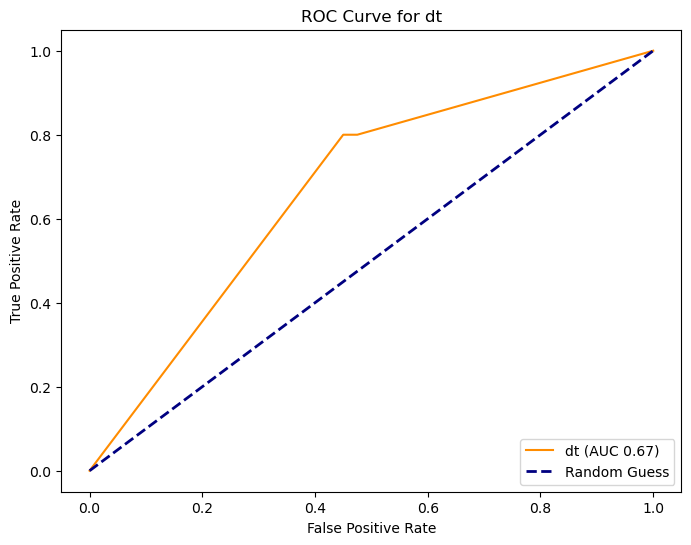


ROC AUC for dt: 0.67


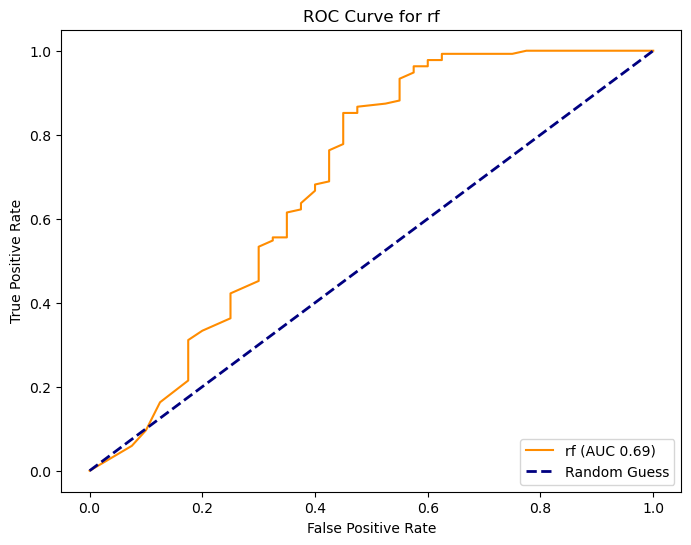


ROC AUC for rf: 0.69


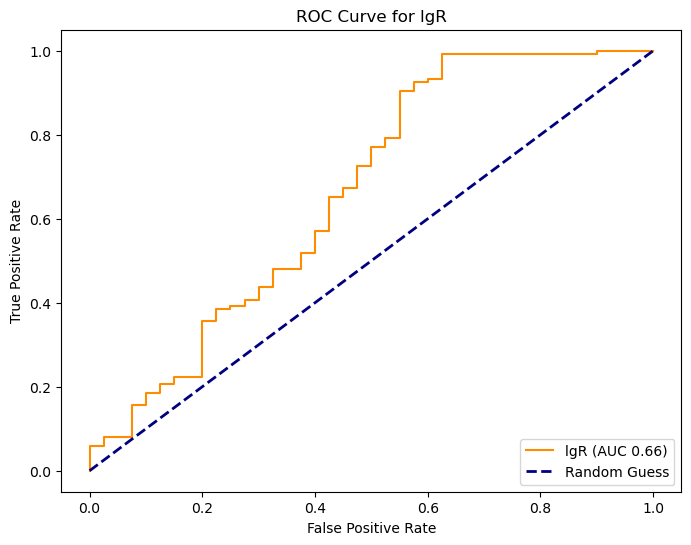


ROC AUC for lgR: 0.66


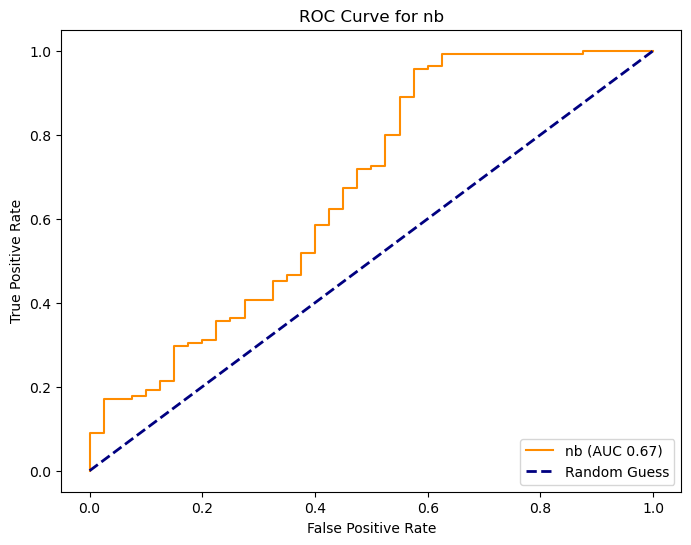


ROC AUC for nb: 0.67


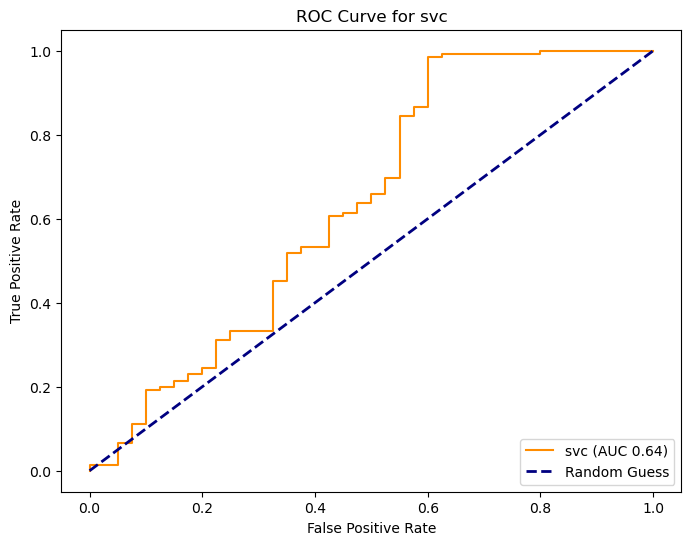


ROC AUC for svc: 0.64


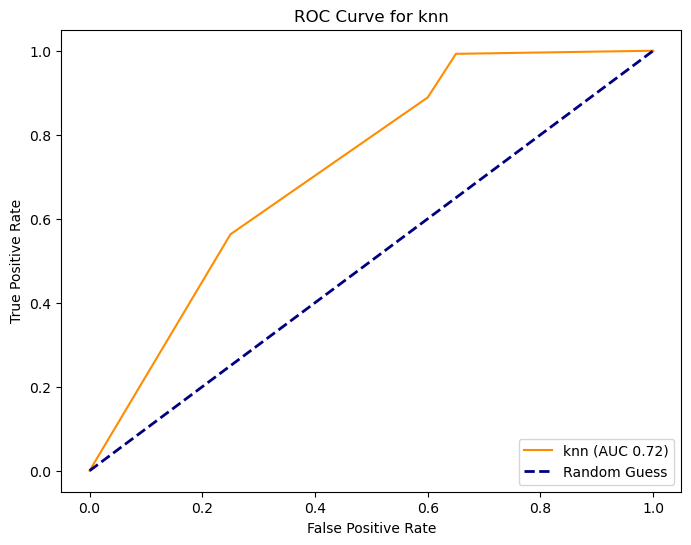


ROC AUC for knn: 0.72


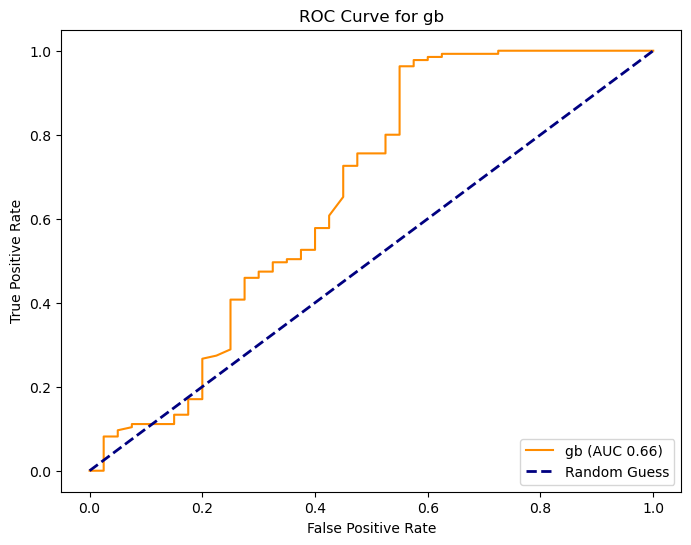


ROC AUC for gb: 0.66

R-squared: {'dt': -0.45833333333333326, 'rf': -0.19907407407407396, 'lgR': 0.125, 'nb': 0.09259259259259256, 'svc': 0.15740740740740744, 'knn': -0.26388888888888884, 'gb': -0.2314814814814814}

Root Mean Squared Error: {'dt': 0.50709255283711, 'rf': 0.45981362684088806, 'lgR': 0.3927922024247863, 'nb': 0.4, 'svc': 0.38544964466377263, 'knn': 0.4720774754816659, 'gb': 0.465985898008574}

Accuracy: {'dt': 0.7428571428571429, 'rf': 0.7885714285714286, 'lgR': 0.8457142857142858, 'nb': 0.84, 'svc': 0.8514285714285714, 'knn': 0.7771428571428571, 'gb': 0.7828571428571428}

Best Model based on Accuracy: svc

Best Model based on RMSE: svc


In [51]:
y_probs = {}
mae = {}
mse = {}
r2 = {}
rmse = {}
acu = {}

for key, value in y_preds.items():
    mae[key] = mean_absolute_error(y_test, value)
    mse[key] = mean_squared_error(y_test, value)
    r2[key] = r2_score(y_test, value)
    rmse[key] = np.sqrt(mse[key])
    acu[key] = accuracy_score(y_test, value) 

    y_probs[key] = model[key].predict_proba(x_test)[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_test, y_probs[key])
    roc_auc = auc(fpr, tpr)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', label='{} (AUC {:.2f})'.format(key, roc_auc))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {key}')
    plt.legend(loc='lower right')
    plt.show()

    print(f"\nROC AUC for {key}: {roc_auc:.2f}")

print("\nR-squared:", r2)
print("\nRoot Mean Squared Error:", rmse)
print("\nAccuracy:", acu)

best_model = max(acu, key=acu.get)
print("\nBest Model based on Accuracy:", best_model)

best_model_rmse = min(rmse, key=rmse.get)
print("\nBest Model based on RMSE:", best_model_rmse)

In [52]:
RF=RandomForestClassifier()
RF.fit(x_train,y_train)

RandomForestClassifier()

In [53]:
cross_val_score(RF,x,y,cv=5)

array([0.78632479, 0.68965517, 0.74137931, 0.80172414, 0.80172414])

In [54]:
cross_val_score(RF,x,y,cv=5).mean()

0.7658709106984969

In [55]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
gscv = GridSearchCV(estimator=RF, param_grid=param_grid, cv=5, scoring='accuracy')

gscv.fit(x_train, y_train)
print("Best Parameters:", gscv.best_params_)
print("Best Accuracy:", gscv.best_score_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.8004817825956037


In [56]:
y_pred=RF.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[ 20  20]
 [ 20 115]]


In [57]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        40
           1       0.85      0.85      0.85       135

    accuracy                           0.77       175
   macro avg       0.68      0.68      0.68       175
weighted avg       0.77      0.77      0.77       175



In [58]:
prediction=RF.predict(x_test)  
prediction

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

user prediction

In [59]:
prediction=df.iloc[2]
print(prediction)

Gender                 1.0
Married                1.0
Dependents             0.0
Education              0.0
Self_Employed          1.0
LoanAmount            66.0
Loan_Amount_Term     360.0
Credit_History         1.0
Property_Area          2.0
Loan_Status            1.0
tot_income          3000.0
Name: 2, dtype: float64


In [60]:
inp = (0,0,0,0,1,100,300,0,1)

array = np.asarray(inp)
reshap = array.reshape(1,-1)

prediction = RF.predict(reshap)

print(prediction)

if (prediction[0]== 1):
    print('Loan Approved')
else:
    print('Loan Rejected')

[0]
Loan Rejected


In [61]:
inp = (1,1,2,0,0,200,300,1.0,2)

array = np.asarray(inp)
reshap = array.reshape(1,-1)

prediction = RF.predict(reshap)

print(prediction)

if (prediction[0]== 1):
    print('Loan Approved')
else:
    print('Loan Rejected')

[0]
Loan Rejected


SAVING THE BEST MODEL

In [62]:
import pickle

In [63]:
import pickle
filename = 'LOAN_best_model.pkl'
pickle.dump(RF, open(filename, 'wb'))